In [1]:
import Permutations as pm
from ToolsForQuasiCord import *

from numpy.random import randint as ri

import sympy
sympy.init_printing()

import itertools
from tqdm.notebook import tqdm

import plotly.express as px
from plotly.subplots import make_subplots

import pandas as pd

## Setting $T>L>R$. On each $T-L$ and $R$, changing $B$ and $L$ one by one

In [ ]:
def map_maker(delta=1, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i*Col + j
        df = pd.read_csv(f"data/T-L_R_series/T-L={delta}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title="T>L>R, T-L={}".format(delta)
    )
    return fig

In [ ]:
map_maker(4,50,4,4).show()

## $T-L=R+1$ series

$[L+R+1,L,B,R],~ (1 \leq R \leq L)$

__予想:__  
* $|L+R+1,L,B,R|=|L+R+1,L,1,R|$
* $L_{n} = (R+1)+(2R+1)n$ として、$|L_{n}+R+1,L_{n},1,R|=R+1,~~ \forall n \in \mathbb{N}$ 

In [ ]:
def map_maker_01(delta=1, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i*Col + j
        df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=380 * Row, width=300 * Col, title="T>L>R, T-L={}".format(delta)
    )
    return fig

In [ ]:
size = 30
Row, Col = 5, 3
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    d = r + 1
    try:
        df = pd.read_csv(f"data/T-L_R_series/T-L={d}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except: pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title="T>L>R, T-L=R+1")
fig.show()

In [ ]:
N = 16
size = 50
# ---
mat = []
ylabel = []
for r in range(N+1):
    try:
        df = pd.read_csv(f"data/T-L_R_series/T-L={r+1}_R={r}_100x100.csv")
        b = 1
        mat += [df.values[b, :size]]
        ylabel += [f"R={r}"]
    except: pass
# ---
display(sympy.Matrix(mat))
fig = px.imshow(mat, y=ylabel, aspect='equal')
# ---
fig.update_layout(height=24*len(ylabel), width=960, title=f"T>L>R, |L+R+1, L, {b}, R|")
fig.show()

In [ ]:
for r in range(1,17):
    seq = []
    try:
        for n in range(50):
            seq += [mat[r-1][((r+1)+(2*r+1)*n)-1]]
    except: pass
    print(seq)

In [ ]:
mtx = []
for r in range(1,17):
    seq = []
    try:
        for n in range(50):
            seq += [mat[r-1][((1+1)+(2*1+1)*n)-1]]
    except: pass
    mtx += [seq]
display(sympy.Matrix(mtx))
px.imshow(mtx)

## $T-L=R+e$ series

In [ ]:
e = 2
size = 50
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    d = r + e
    try:
        df = pd.read_csv(f"data/T-L_R_series/T-L={d}_R={r}_100x100.csv")
        mat = df.values[:size,:size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except: pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title=f"T>L>R, T-L=R+{e}")
fig.show()

## $T=L+e$ series

$[L+e,L,B,R],~~(L \geq B+R)$

__予想01:__ 
* $|L,L,B,R| = |L+1,L,B,R| = |B+R,B+R,B,R|,~ (L \geq B + R)$

In [ ]:
e = 2
size = 30
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    mat = []
    try:
        df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
        for b in range(size):
            s = b+r  #int((b+r)/2) + ((b+r)%2)  #0  #
            try:
                mat += [df.values[b, s:size+s]]
            except: pass
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except: pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title=f"T-L={e}")
fig.show()

## Transposition

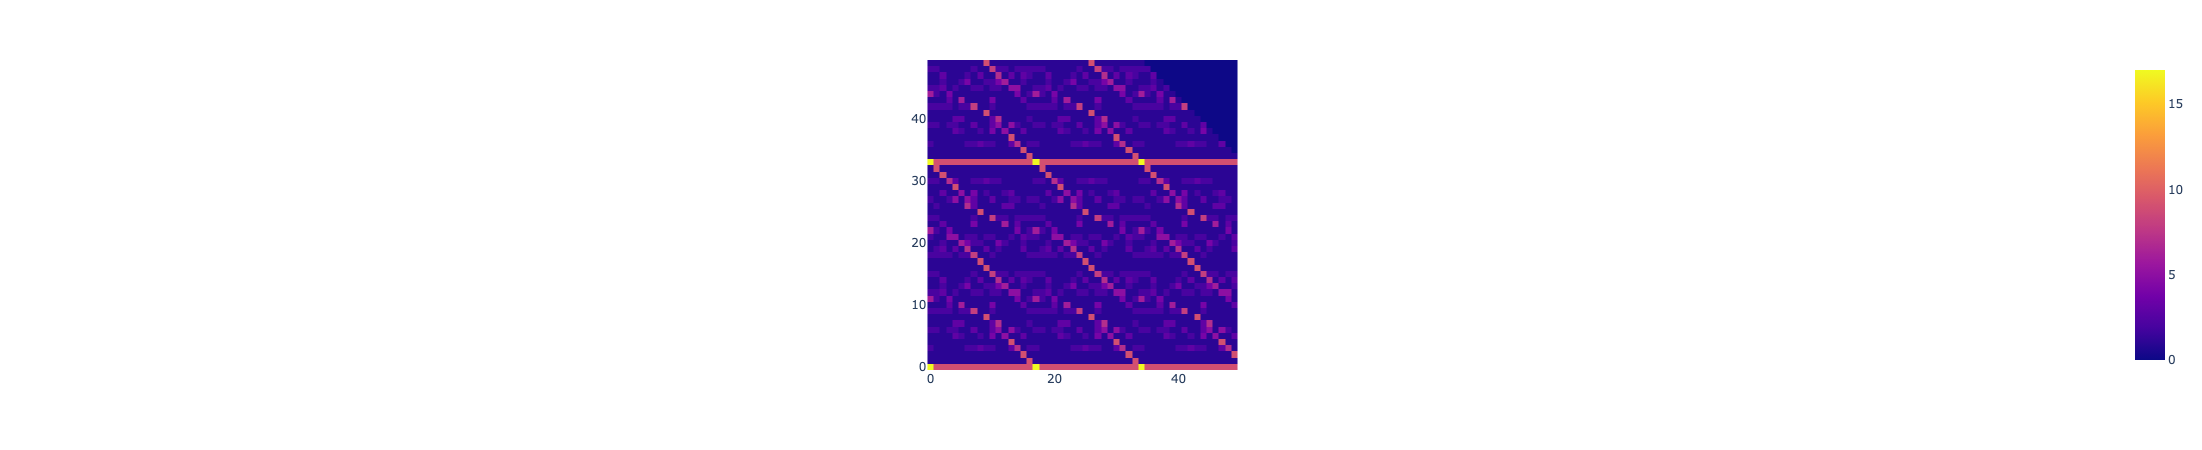

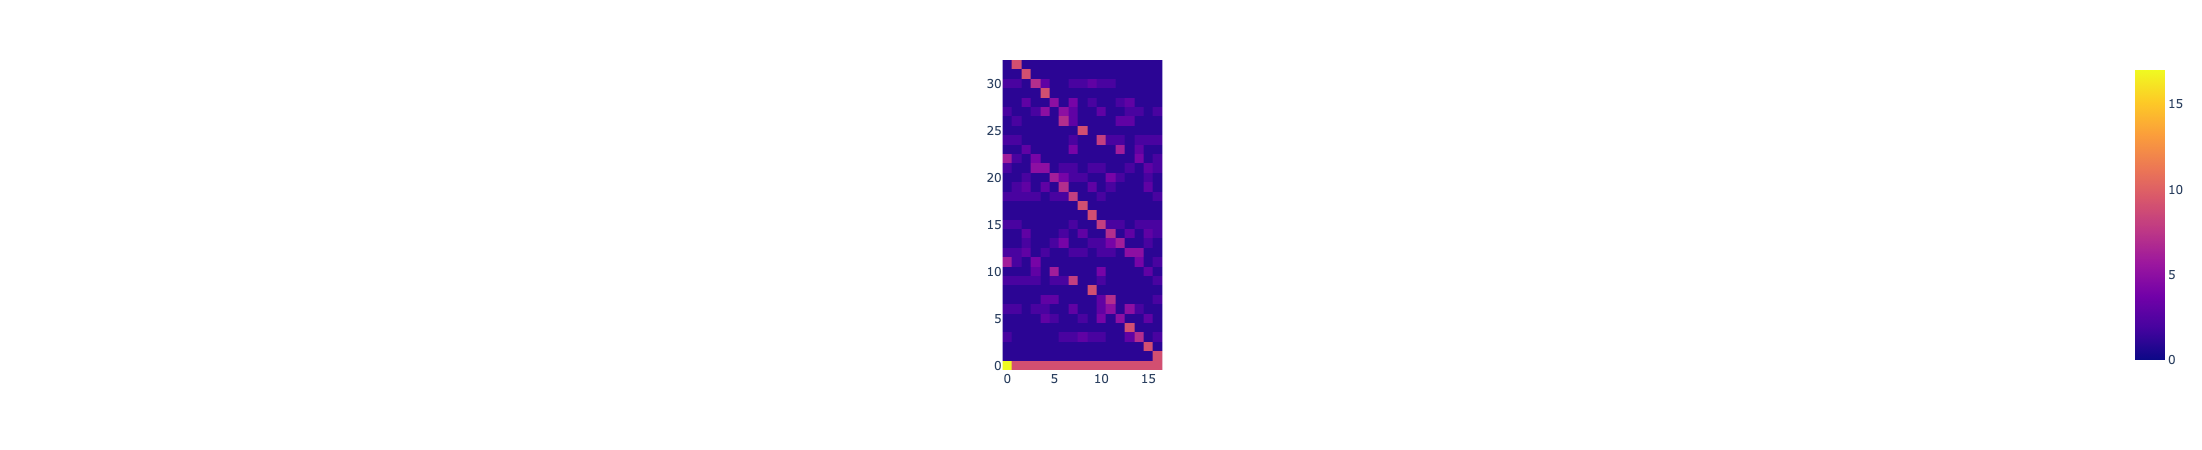

In [112]:
e, r = 9, 16
shift = max(0, e-r)
size = 50
tamed_matrix = []
df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
for b in range(size):
    seq = []
    s = b+r
    for i in range(size):
        try:
            seq += [df.values[b][s+i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
tamed_matrix = np.array(tamed_matrix)
px.imshow(tamed_matrix, origin='lower').show()
fig = px.imshow(tamed_matrix[shift:(shift+2*r+1),:2*e-1], origin='lower', zmin=0, aspect='equal')
fig.show()

### Transposition along B-axis

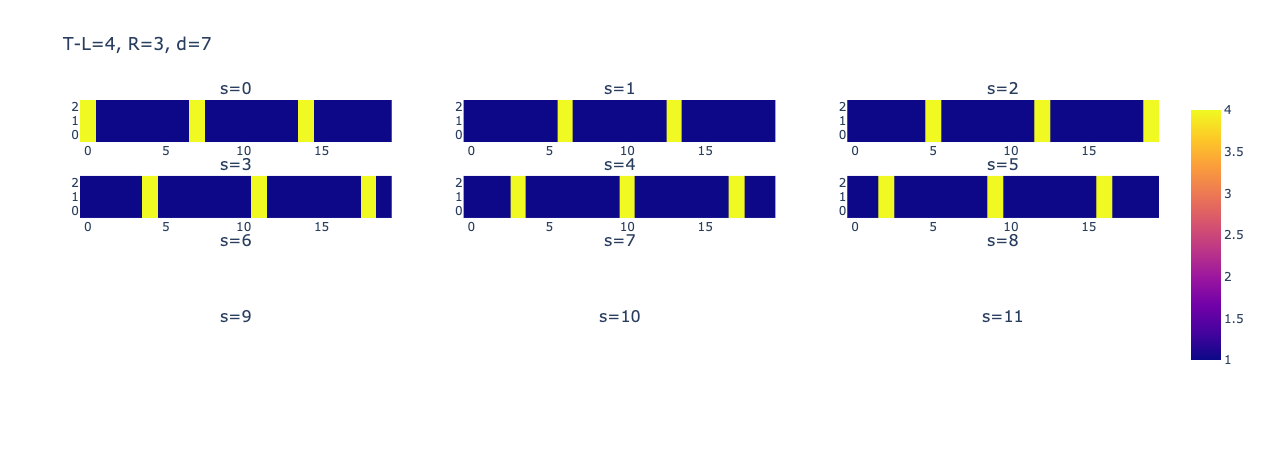

In [28]:
d = 2*r+1
#---
Row, Col = 4, 3
fig = make_subplots(
    Row, Col, subplot_titles=[f"s={s}" for s in range(Row * Col)]
)
# ---
for i, j in itertools.product(range(Row), range(Col)):
    s = i * Col + j
    try:
        mat = [tamed_matrix[s+n*d] for n in range(int(size/d)+1)]
        fig.append_trace(px.imshow(mat).data[0], i+1, j+1)
    except: pass
# ---
fig.update_layout(title=f"T-L={e}, R={r}, d={d}")
fig.show()

### Transposition along L-axis

In [ ]:
d = 2*e-1
#---
Row, Col = 3, 3
fig = make_subplots(
    Row, Col, subplot_titles=[f"s={s}" for s in range(Row * Col)]
)
# ---
for i, j in itertools.product(range(Row), range(Col)):
    s = i * Col + j
    mat = np.transpose(np.stack([tamed_matrix[:,s+n*d] for n in range(int(size/d)-5)],0))
    fig.append_trace(px.imshow(mat).data[0], i+1, j+1)
# ---
fig.update_layout(height=400*Row, width=200*Col, title=f"T-L={e}, R={r}, d={d}")
fig.show()

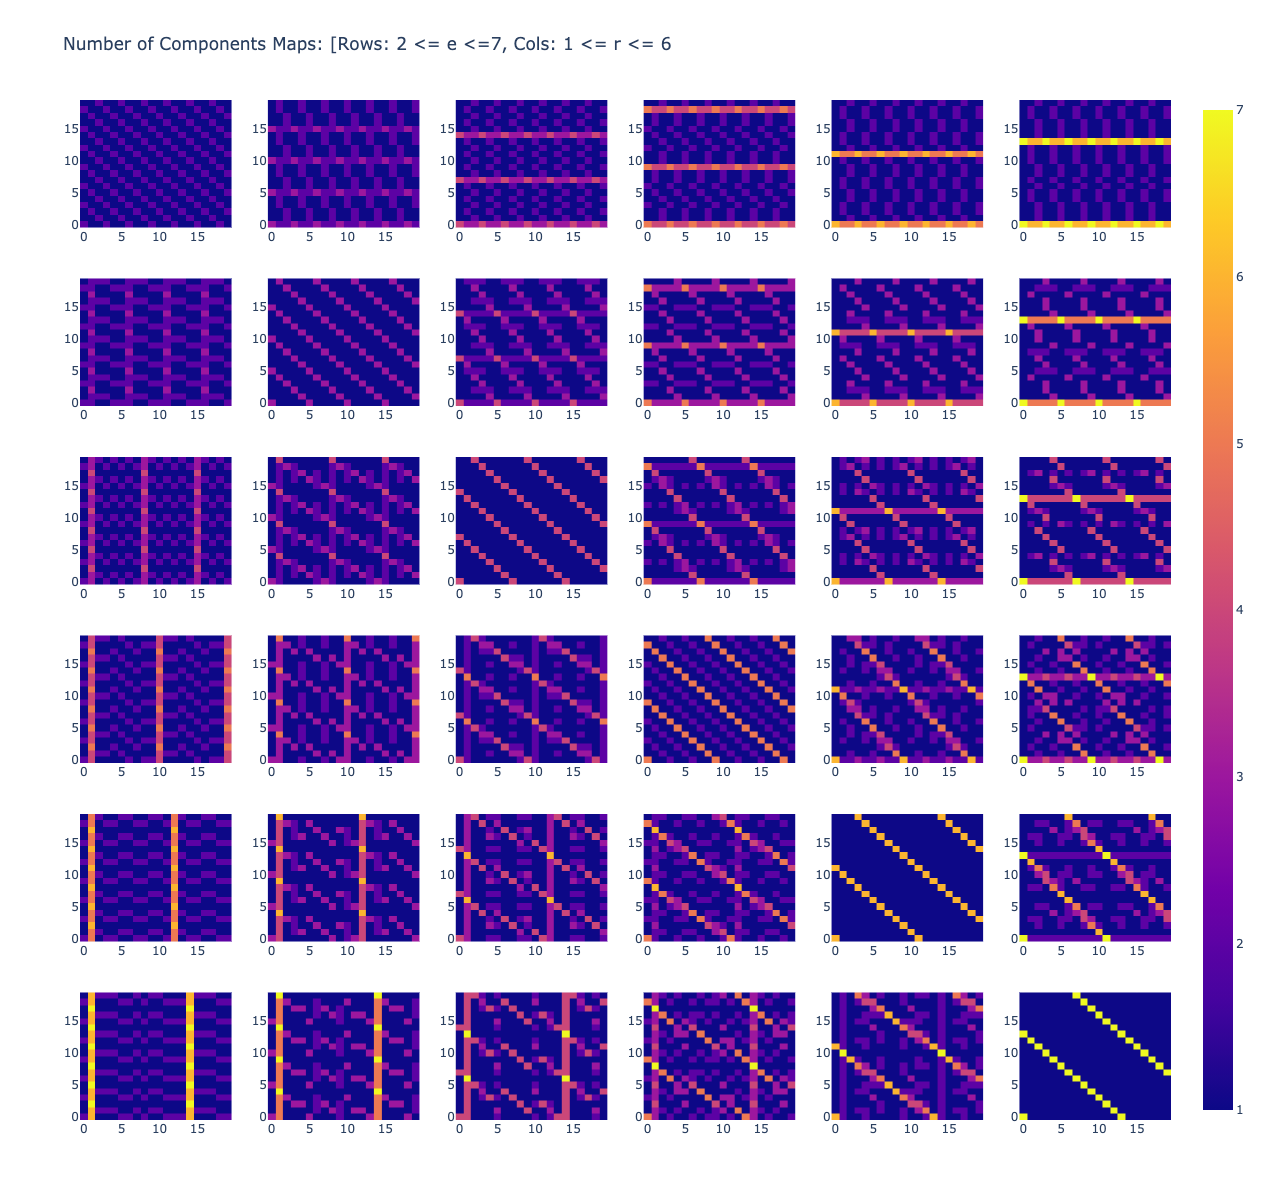

In [97]:
Row, Col = 6, 6
fig = make_subplots(Row, Col)
#---
for e, r in itertools.product(range(2,Row+2), range(1,Col+1)):
    shift = max(0, e-r)
    size = 20
    tamed_matrix = []
    df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
    for b in range(size):
        seq = []
        s = b+r
        for i in range(size):
            try:
                seq += [df.values[b+shift][s+i]]
            except:
                seq += [0]
        tamed_matrix += [seq]
    tv = [2*r+1, 2*e-1]
    fig.append_trace(px.imshow(tamed_matrix).data[0], e-1, r)
# ---
fig.update_layout(height=200*Row, width=200*Col, title=f"Number of Components Maps: [Rows: 2 <= e <={Row+1}, Cols: 1 <= r <= {Col}")
fig.show()

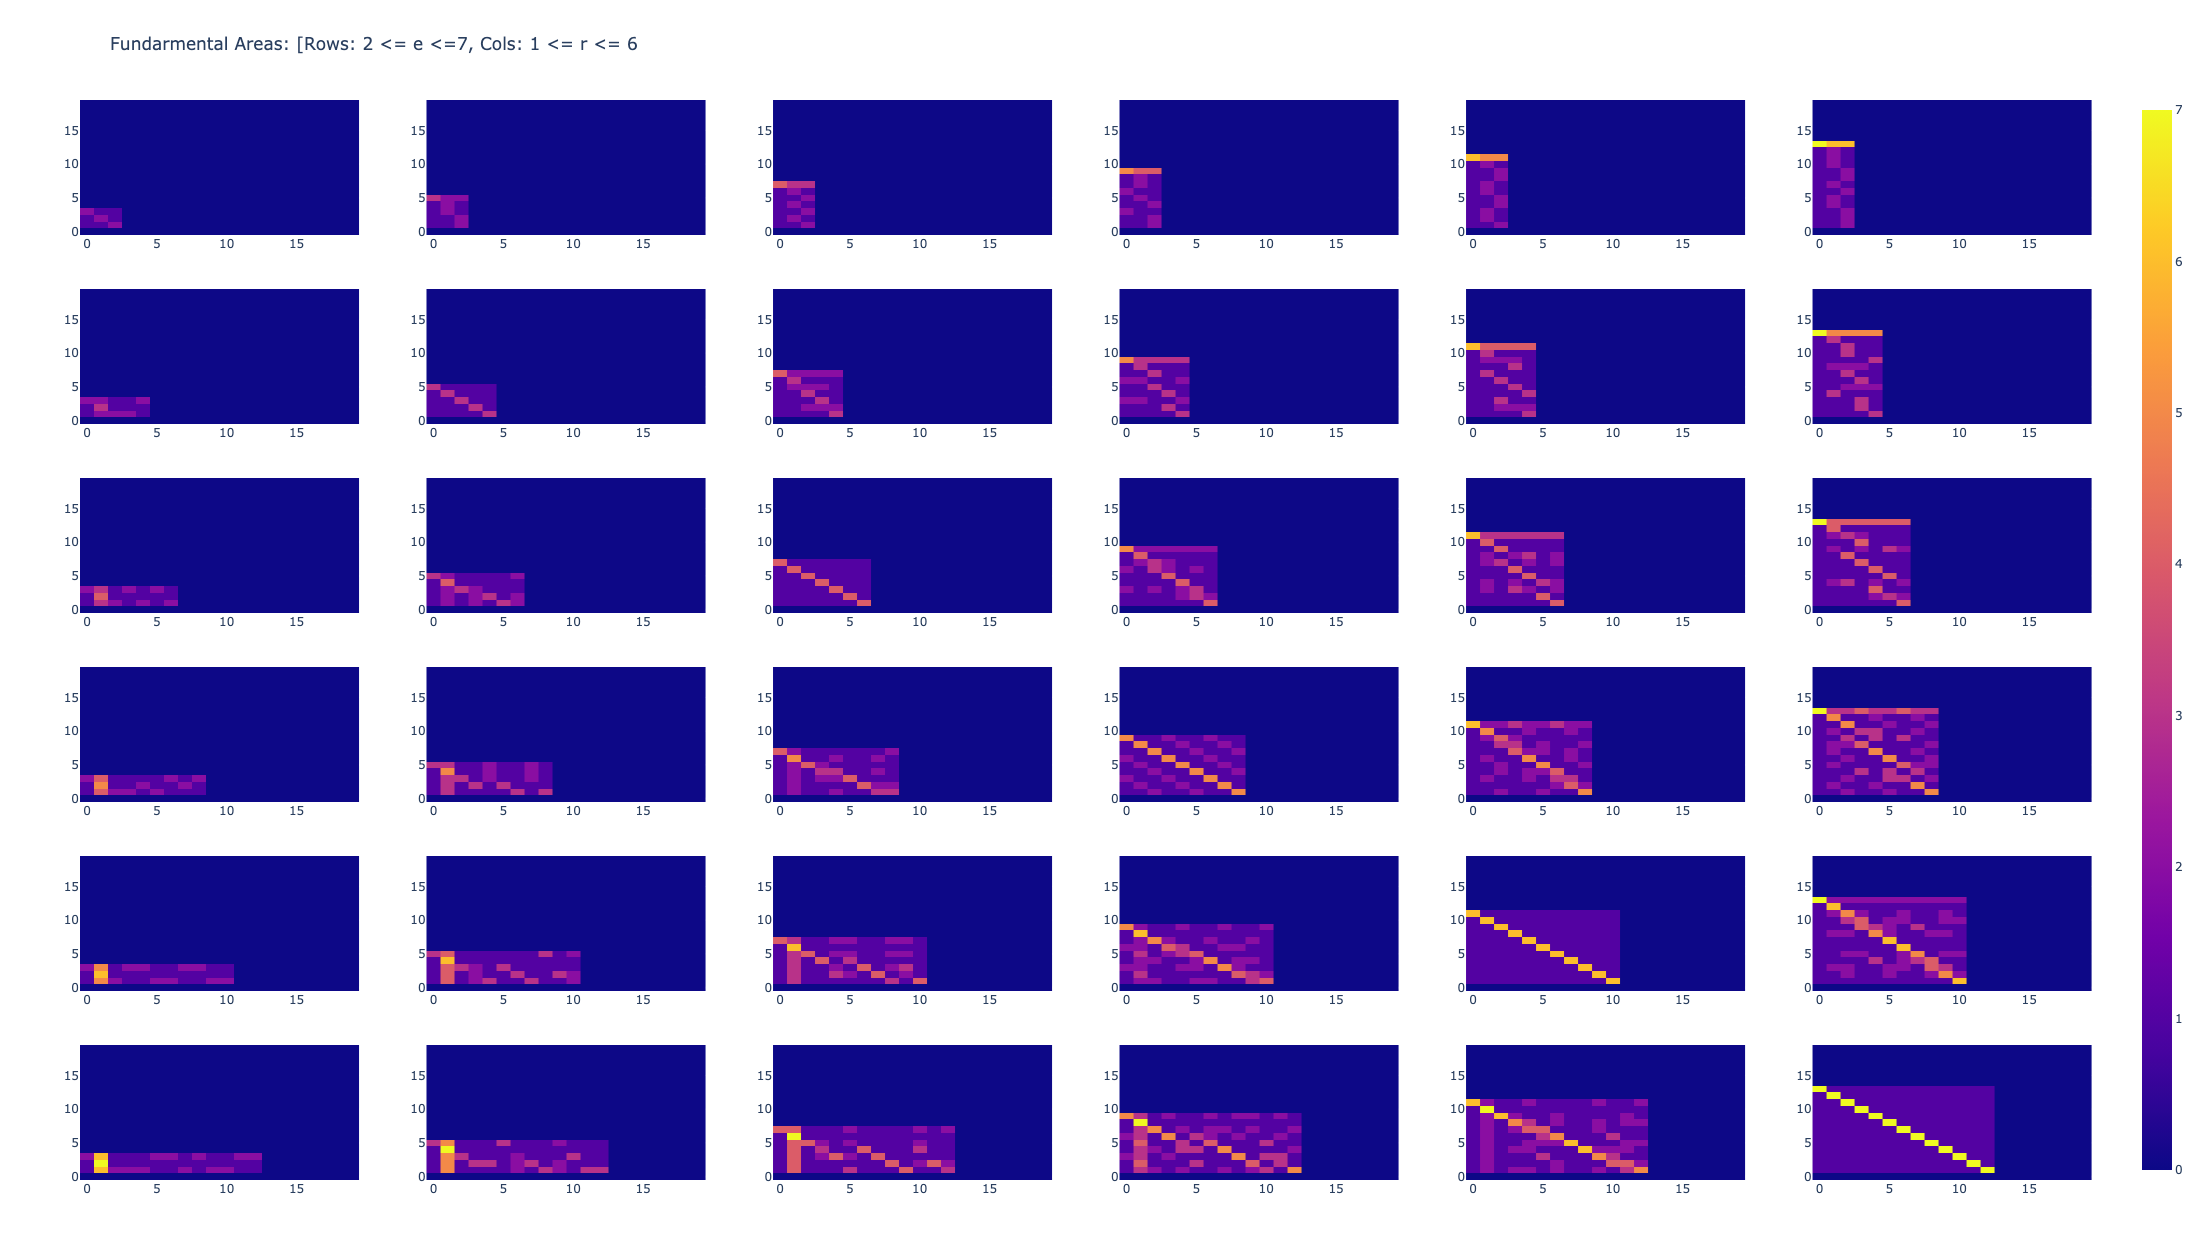

In [113]:
Row, Col = 6, 6
box_size = 20  #max(2*Col+1, 2*Row-1)
fig = make_subplots(Row, Col)
#---
for e, r in itertools.product(range(2,Row+2), range(1,Col+1)):
    funda_area = np.zeros((box_size,box_size), dtype=int)
    shift = max(0, e-r)
    size = 20
    tamed_matrix = []
    df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
    for b in range(size):
        seq = []
        s = b+r
        for i in range(size):
            try:
                seq += [df.values[b+shift][s+i]]
            except:
                seq += [0]
        tamed_matrix += [seq]
    tv = [2*r+1, 2*e-1]
    for i,j in itertools.product(range(box_size),range(box_size)):
        try:
            funda_area[i+1][j] = np.array(tamed_matrix)[1:tv[0]+1,:tv[1]][i][j]
        except: pass
    hm = px.imshow(funda_area, aspect='equal')
    fig.append_trace(hm.data[0], e-1, r)
#     fig.append_trace(px.imshow(tamed_matrix).data[0], e-1, r)
# ---
fig.update_layout(height=210*Row, width=200*Col, title=f"Fundarmental Areas: [Rows: 2 <= e <={Row+1}, Cols: 1 <= r <= {Col}")
# ---
fig.show()

## Point refrection

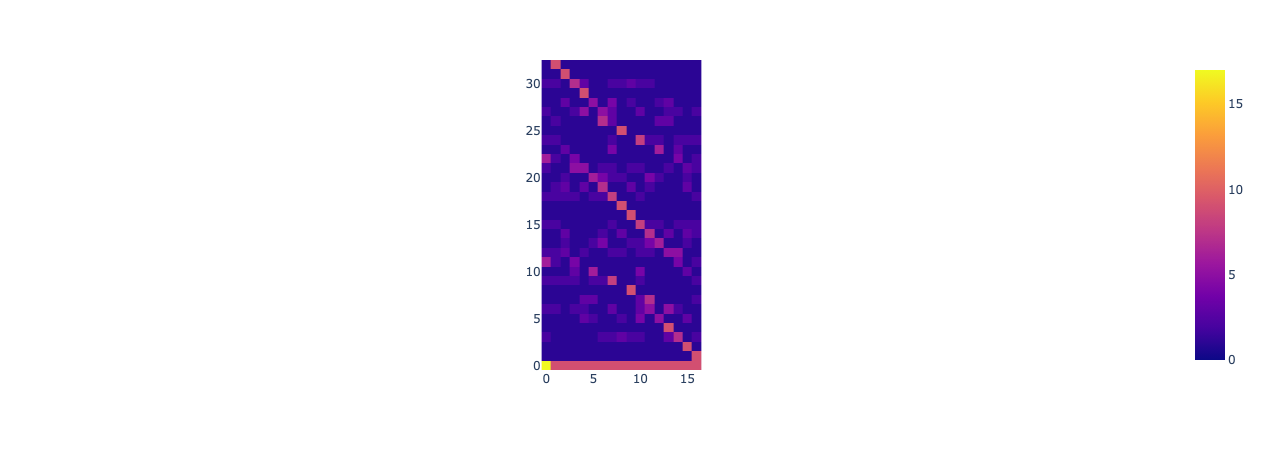

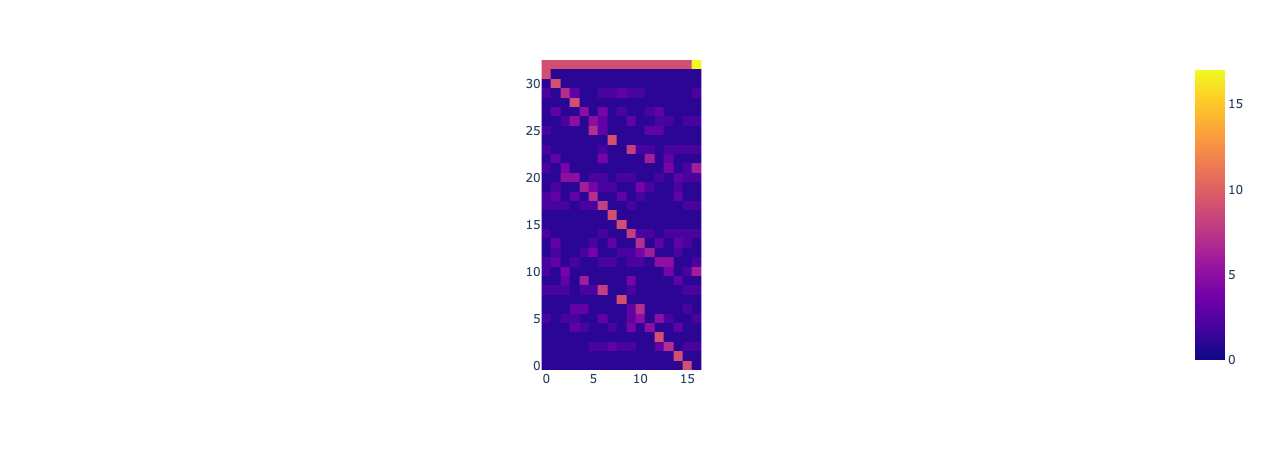

In [126]:
e, r = 9, 16
shift = max(0, e-r)
size = 50
tamed_matrix = []
df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
for b in range(size):
    seq = []
    s = b+r
    for i in range(size):
        try:
            seq += [df.values[b][s+i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
tamed_matrix = np.array(tamed_matrix)
# px.imshow(tamed_matrix, origin='lower').show()
#---
funda_matrix = tamed_matrix[shift:(shift+2*r+1),:2*e-1]
px.imshow(funda_matrix, origin='lower', zmin=0, aspect='equal').show()

pref_matrix = np.zeros((2*r+1, 2*e-1), dtype=int)
for i,j in itertools.product(range(2*r+1), range(2*e-1)):
    pref_matrix[i][j] = funda_matrix[2*r+1-i-1][2*e-1-j-1]
px.imshow(pref_matrix, origin='lower', zmin=0, aspect='equal').show()

## $[B+R,B+R,B,R]$

__予想02:__
* $|B+R,B+R,B,R| = |B+2R+1,B+R,1,R|$

In [ ]:
e = 0
N = 16
size = 50
# ---
mat, ylabel = [], []
for r in range(1, N + 1):
    try:
        df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
        # ---
        mat += [[df.values[b, b + r] for b in range(size)]]
        ylabel += [f"R={r}"]
    except:
        pass
# ---
fig = px.imshow(mat, y=ylabel, aspect="equal")
fig.update_layout(height=24 * len(ylabel), width=960, title=f"|B+R+{e},B+R,B,R|")
fig.show()

### animation

In [ ]:
delta = 2
size = 50
data = []
for r in range(1,16+1):
    df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
    mat = df.values[:size,:size]
    data += [mat]
    # ---
px.imshow(data, animation_frame=0)

In [ ]:
N = 16
fig = go.Figure(
    data=[go.Heatmap(z=data[0], zmax=20)],
    layout=go.Layout(
        title="R=0",
        title_x=0.5,
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None]),
                    dict(label="Pause",
                         method="animate",
                         args=[None,
                               {"frame": {"duration": 0, "redraw": False},
                                "mode": "immediate",
                                "transition": {"duration": 0}}],
                         )])]
    ),
    frames=[go.Frame(data=[go.Heatmap(z=data[i], zmax=20)],
                     layout=go.Layout(title_text=f"R={i}")) 
            for i in range(1, N)]
)
fig.update_layout(height = 460, width = 460)
fig.show()